# Importing Libraries: 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
import joblib as jb

# Reading data: 

In [12]:
df = pd.read_csv('Pakistani_Diabetes_Dataset.csv')

In [13]:
df.head(5)

,Age_Group,Gender,Height_Feet,Height_Inches,Weight_Kg,BMI,HbA1c,Glucose_Fasting,Creatinine,Serum_Cholesterol,HDL_Cholesterol,Serum_Triglycerides,LDL_Cholesterol,VLDL_Cholesterol,Hemoglobin,CGFR,Diabetes_Detection,Diabetes_Level,Sugar_Type
0,31-45,Female,4.0,48.0,67.5,25.5,4.3,70.0,0.69,174.7,50.6,196.1,84.8,39.2,12.2,94.9,Not Detected,Normal,No Diabetes
1,76+,Female,4.0,48.0,53.3,22.2,5.1,96.9,1.23,265.6,43.6,231.2,175.8,46.2,10.3,41.9,Not Detected,Normal,No Diabetes
2,46-60,Female,4.0,48.0,46.0,16.9,5.8,126.1,1.06,229.4,48.6,190.9,142.6,38.2,12.3,54.1,Detected,Prediabetes,Type 2 Diabetes
3,46-60,Male,4.0,48.0,56.8,18.0,4.9,92.4,1.44,211.8,67.3,208.7,102.8,41.7,13.2,51.4,Not Detected,Normal,No Diabetes
4,18-30,Male,4.0,48.0,52.1,23.2,5.2,107.7,0.80,201.0,35.3,228.8,120.0,45.8,17.3,118.4,Detected,Normal,No Diabetes


# EDA: 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age_Group            100000 non-null  object 
 1   Gender               100000 non-null  object 
 2   Height_Feet          100000 non-null  float64
 3   Height_Inches        100000 non-null  float64
 4   Weight_Kg            100000 non-null  float64
 5   BMI                  100000 non-null  float64
 6   HbA1c                100000 non-null  float64
 7   Glucose_Fasting      100000 non-null  float64
 8   Creatinine           100000 non-null  float64
 9   Serum_Cholesterol    100000 non-null  float64
 10  HDL_Cholesterol      100000 non-null  float64
 11  Serum_Triglycerides  100000 non-null  float64
 12  LDL_Cholesterol      100000 non-null  float64
 13  VLDL_Cholesterol     100000 non-null  float64
 14  Hemoglobin           100000 non-null  float64
 15  CGFR              

In [15]:
le = LabelEncoder()

In [16]:
for i in ['Age_Group', 'Gender', 'Diabetes_Detection', 'Diabetes_Level', 'Sugar_Type']:
    df[i] = le.fit_transform(df[i])

In [17]:
df.sample(2)

,Age_Group,Gender,Height_Feet,Height_Inches,Weight_Kg,BMI,HbA1c,Glucose_Fasting,Creatinine,Serum_Cholesterol,HDL_Cholesterol,Serum_Triglycerides,LDL_Cholesterol,VLDL_Cholesterol,Hemoglobin,CGFR,Diabetes_Detection,Diabetes_Level,Sugar_Type
25687,1,0,4.0,48.0,60.1,25.0,5.8,113.4,0.85,207.2,33.0,206.4,132.9,41.3,12.6,74.5,0,1,1
63037,3,0,4.0,48.0,69.1,28.8,6.5,140.3,0.95,272.9,60.7,101.2,191.9,20.2,14.1,58.3,0,1,1


<Axes: >

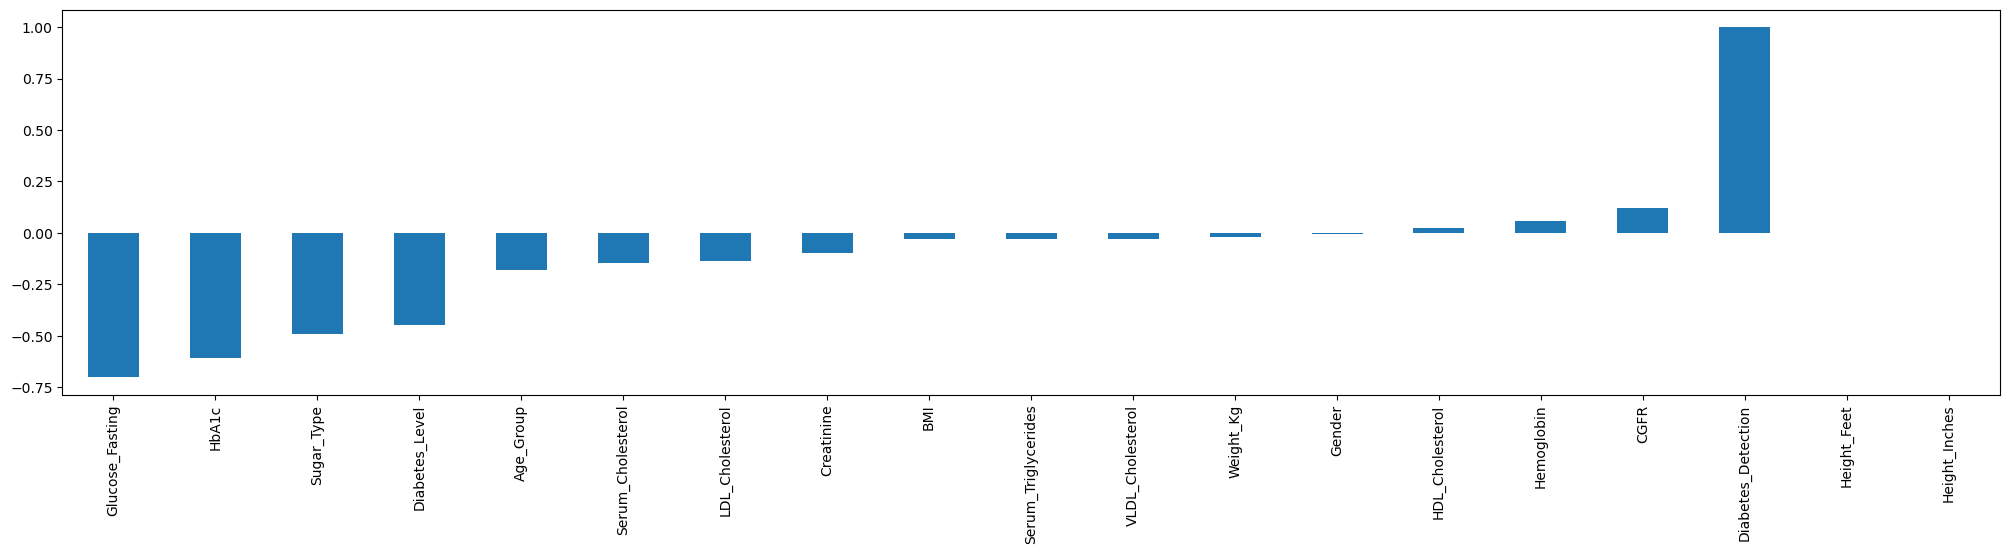

In [18]:
plt.figure(figsize=(25, 5))
df.corr()['Diabetes_Detection'].sort_values().plot(kind='bar')

<Axes: >

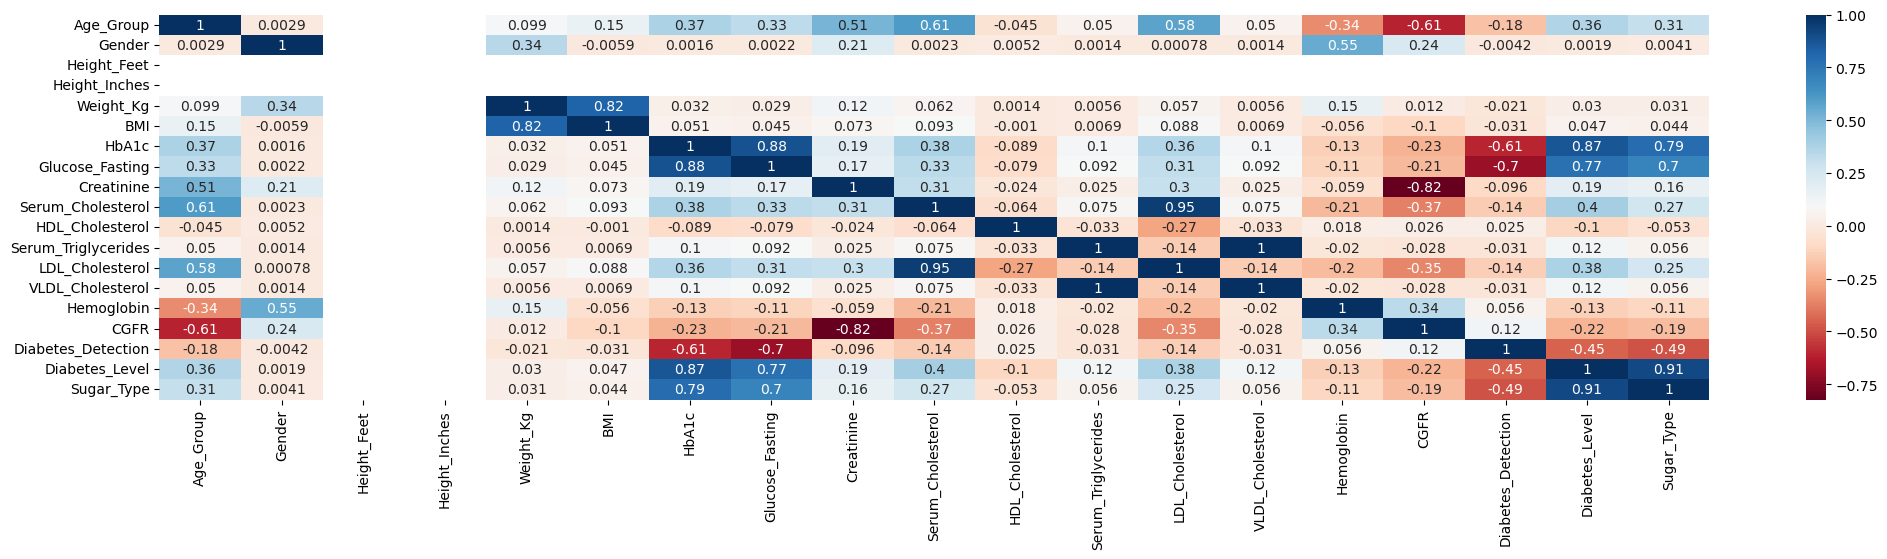

In [19]:
plt.figure(figsize=(25, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

In [20]:
# fig = plt.figure(figsize=(25, 5))
# sns.pairplot(df, hue='Diabetes_Detection', diag_kind='kde')

In [21]:
diabetes_detection = df.pivot_table(columns='Diabetes_Detection', values=['Serum_Cholesterol', 'HbA1c', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_detection

Diabetes_Detection,0,1
BMI,25.947871,25.619846
CGFR,72.733138,80.395447
HbA1c,5.854925,4.930158
Hemoglobin,13.609878,13.783094
Serum_Cholesterol,220.893775,205.623233


<Axes: >

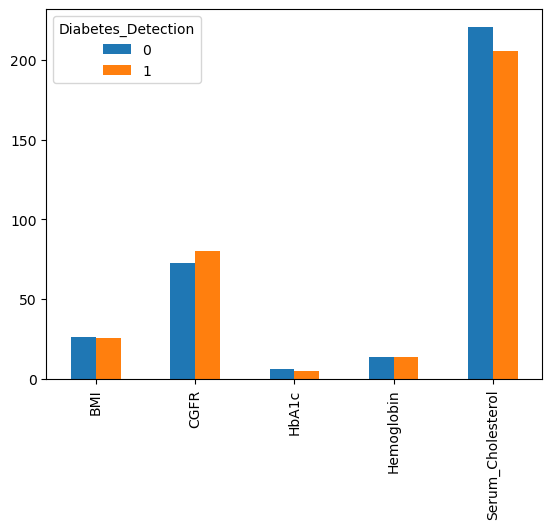

In [22]:
diabetes_detection.plot(kind='bar')

In [23]:
diabetes_aged = df.pivot_table(columns='Age_Group', values=['Serum_Cholesterol', 'HbA1c', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_aged

Age_Group,0,1,2,3,4
BMI,24.558214,25.469901,26.498634,26.989510,25.917403
CGFR,101.893749,81.553625,67.350660,57.117104,49.808498
HbA1c,5.301804,5.498322,5.696865,5.894226,6.092978
Hemoglobin,14.236684,13.959614,13.548449,13.104815,12.825219
Serum_Cholesterol,179.960178,200.886440,223.857905,249.604842,265.225931


<Axes: >

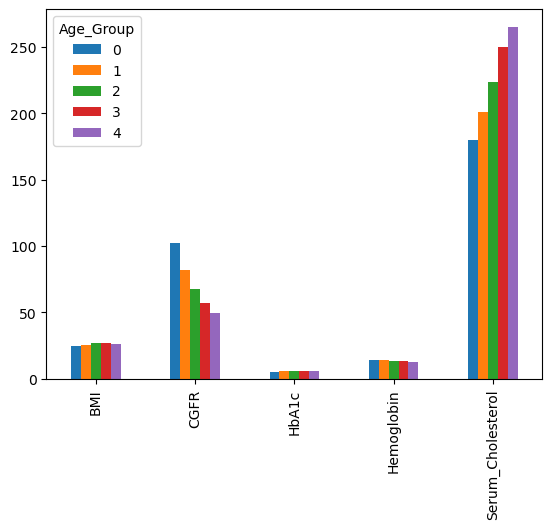

In [24]:
diabetes_aged.plot(kind='bar')

In [25]:
diabetes_gender = df.pivot_table(columns='Gender', values=['Serum_Cholesterol', 'HbA1c', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_gender

Gender,0,1
BMI,25.896738,25.844137
CGFR,68.223212,80.917938
HbA1c,5.635996,5.638002
Hemoglobin,12.936498,14.372076
Serum_Cholesterol,217.192738,217.398529


<Axes: >

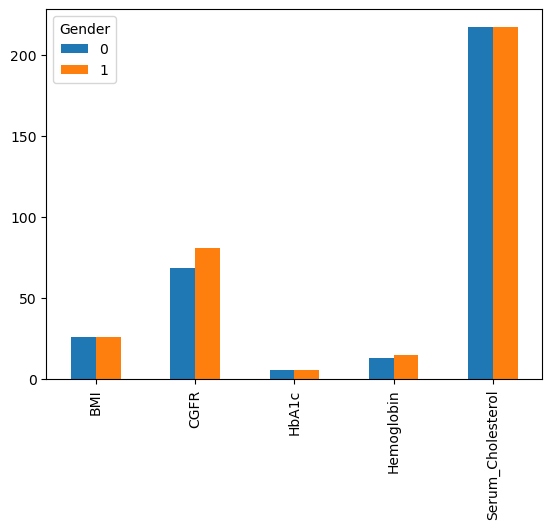

In [26]:
diabetes_gender.plot(kind='bar')

In [27]:
diabetes_sugartype = df.pivot_table(columns='Sugar_Type', values=['LDL_Cholesterol', 'HDL_Cholesterol', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_sugartype

Sugar_Type,0,1
BMI,25.695358,26.095456
CGFR,79.073664,68.718289
HDL_Cholesterol,50.036658,48.957351
Hemoglobin,13.773632,13.492910
LDL_Cholesterol,126.815982,150.735844


<Axes: >

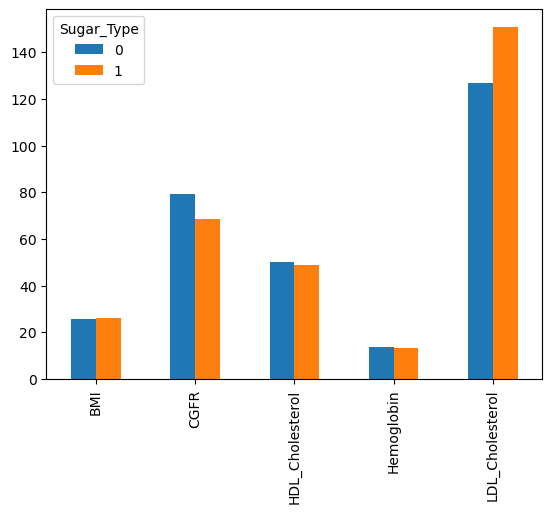

In [28]:
diabetes_sugartype.plot(kind='bar')

# Machine Learning:

In [29]:
df['Diabetes_Detection'].value_counts(normalize=True)

Diabetes_Detection
0    0.76434
1    0.23566
Name: proportion, dtype: float64

In [30]:
X = df.drop('Diabetes_Detection', axis=1)

In [31]:
Y = df['Diabetes_Detection']

In [32]:
smote = SMOTE(random_state=42)

In [33]:
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75)

In [35]:
lc = LogisticRegression(C=0.01, max_iter=10, verbose=1)

In [36]:
rfc = RandomForestClassifier(n_estimators=7, max_depth=2, random_state=42, verbose=1)

In [37]:
lc.fit(x_train, y_train)

E:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, max_iter=10, verbose=1)

In [38]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=7, random_state=42, verbose=1)

In [39]:
y_pred_lc = lc.predict(x_test)

In [40]:
y_pred_rfc = rfc.predict(x_test)

In [41]:
print('Classification Matrix of Logistic Regression: ')
print(classification_report(y_test, y_pred_lc))

Classification Matrix of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     19082
           1       0.81      0.69      0.75      5918

    accuracy                           0.89     25000
   macro avg       0.86      0.82      0.84     25000
weighted avg       0.89      0.89      0.89     25000



In [42]:
print('Classification Matrix of Random Forest: ')
print(classification_report(y_test, y_pred_rfc))

Classification Matrix of Random Forest: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     19082
           1       1.00      0.33      0.50      5918

    accuracy                           0.84     25000
   macro avg       0.91      0.66      0.70     25000
weighted avg       0.87      0.84      0.81     25000



<Axes: title={'center': 'Confusion Matrix for Random Forest: '}>

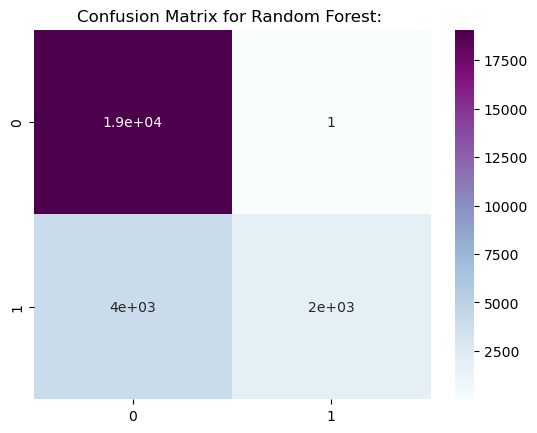

In [43]:
plt.title('Confusion Matrix for Random Forest: ')
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, cmap='BuPu')

<Axes: title={'center': 'Confusion Matrix for Logistic Regression: '}>

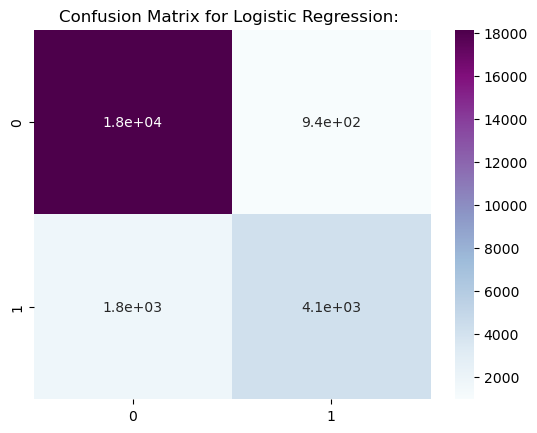

In [44]:
plt.title('Confusion Matrix for Logistic Regression: ')
sns.heatmap(confusion_matrix(y_test, y_pred_lc), annot=True, cmap='BuPu')

In [45]:
accuracy_scores = [
    {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test, y_pred_rfc)},
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, y_pred_lc)},
]

In [46]:
accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)

In [47]:
accuracy_df

,Model,Accuracy Score
1,Logistic Regression,0.88960
0,Random Forest,0.84124


<Axes: >

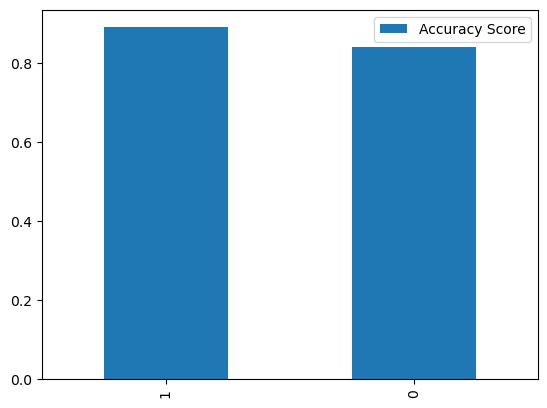

In [48]:
accuracy_df.plot(kind='bar')

# Saving Model: 

In [49]:
jb.dump(rfc, 'Diabetespredictionmodel(RFC).model')

['Diabetespredictionmodel(RFC).model']

In [50]:
jb.dump(lc, 'Diabetespredictionmodel(LC).model')

['Diabetespredictionmodel(LC).model']

In [51]:
x_test[:2]

,Age_Group,Gender,Height_Feet,Height_Inches,Weight_Kg,BMI,HbA1c,Glucose_Fasting,Creatinine,Serum_Cholesterol,HDL_Cholesterol,Serum_Triglycerides,LDL_Cholesterol,VLDL_Cholesterol,Hemoglobin,CGFR,Diabetes_Level,Sugar_Type
92333,4,1,4.0,48.0,72.0,27.3,6.0,121.5,1.05,286.9,51.0,216.3,192.7,43.3,13.0,67.8,1,1
92008,2,1,4.0,48.0,72.1,25.7,5.4,122.8,0.85,199.5,56.8,54.1,131.9,10.8,13.2,94.5,0,0


In [52]:
y_test[:2]

92333    0
92008    0
Name: Diabetes_Detection, dtype: int32

In [53]:
lc.predict([[0,0,4.0,48.0,67.5,25.5,6.1,114.8,0.62,183.6,41.5,169.0,108.4,33.8,14.2,119.2,1,1]])

E:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [54]:
rfc.predict([[0,0,4.0,48.0,67.5,25.5,6.1,114.8,0.62,183.6,41.5,169.0,108.4,33.8,14.2,119.2,1,1]])

E:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [55]:
# Done